In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import ngrams
import spacy
%matplotlib inline

wordnet = WordNetLemmatizer()
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

In [ ]:
!conda install -c conda-forge wordcloud

In [2]:
def clean_text(text,stopwords):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower()
    text = text.split(' ')
    text = [wordnet.lemmatize(word) for word in text]
    text = [word for word in text if word not in stopwords]
    text = ' '.join(text)
    return text

def combine_data(list1, list2):
    combined_data = []
    for i in range(len(list1)):
        new_str = list1[i] +' ' + list2[i]
        combined_data.append(new_str)
    return combined_data

def generate_frequency(text_list):
    fdist =  FreqDist()
    for i in text_list:
        words = i.split(' ')
        words = [word for word in words if word != '']
        words = ngrams(words,1)
        for x in words:
            fdist[x[0]]+=1
    return fdist

In [3]:
df = pd.read_csv('../Dataset/RedditSuicideData.csv')

In [4]:
df.head()

,id,subreddit,title,text
0,greo4o,SuicideWatch,“If you truly wanted to kill yourself and wasn...,"Yeah because I DONT WANT TO FUCKING DO IT, but..."
1,c34ko8,SuicideWatch,My girlfriend killed herself a week after we b...,Hello. I don't really know how to start this. ...
2,f9d5go,SuicideWatch,Anyone else not want to die and not want to ki...,NaN
3,e8gjky,SuicideWatch,Raped in front of my girlfriend. feeling like ...,"\n\nI don't know what to say or do, I just fe..."
4,kn89hg,SuicideWatch,"""Suicide is a permanent solution to a temporar...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 4 columns):
id           2958 non-null object
subreddit    2958 non-null object
title        2958 non-null object
text         2566 non-null object
dtypes: object(4)
memory usage: 92.6+ KB


In [5]:
new_words = ["http", "www", "co", "u", "com", "t", "s", "m",
             "ve", "dy", "ll", 'n', 'r', 'b', "wa", "y", "don", "ha"]
for words in new_words:
    all_stopwords.add(words)

In [6]:
df['text'].fillna(value=' ',inplace=True)

In [7]:
df['title'] = df['title'].apply(clean_text, stopwords = all_stopwords)
df['text'] = df['text'].apply(clean_text, stopwords = all_stopwords)

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'D:\\anaconda\\nltk_data'
    - 'D:\\anaconda\\share\\nltk_data'
    - 'D:\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [8]:
df['cleaned'] = combine_data(df['title'],df['text'])

In [9]:
df.to_csv('./cleanedRedditSuicide.csv', index=False)

In [10]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [11]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

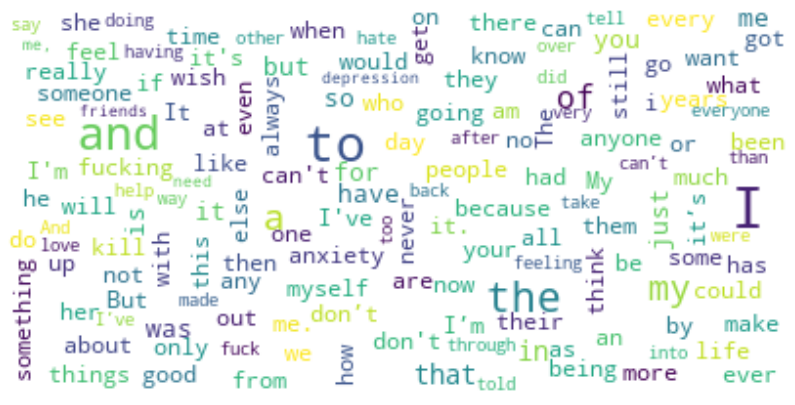

In [12]:
wordcloud = WordCloud(background_color="white",max_font_size=30).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
df = pd.read_csv('../Dataset/TwitterSuicideData.csv')

In [14]:
df.head()

,id,date,text
0,1361102918728884230,2021-02-14 23:59:58+00:00,@CourageBipolar @VoltzRoad @BAIntactivists had...
1,1361102815104557057,2021-02-14 23:59:33+00:00,@pcrafton4 @MrMan45676274 @beardedmilkdud6 @Ci...
2,1361102759966224386,2021-02-14 23:59:20+00:00,@langoo @St3v3ns1 @BFryback Sounds like the mo...
3,1361102721139499016,2021-02-14 23:59:11+00:00,tw // suicide ??\n\nsomeone talk me out of it pls
4,1361102674079457281,2021-02-14 23:59:00+00:00,Death metal looked to have exhaled its last by...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3000 non-null   int64 
 1   date    3000 non-null   object
 2   text    3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [17]:
df.to_csv('./cleanedTwitterSuicide.csv', index=False)

In [19]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

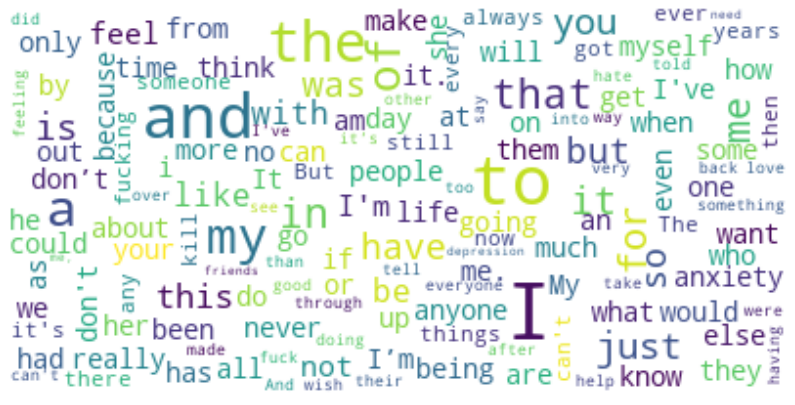

In [20]:
wordcloud = WordCloud(background_color="white",max_font_size=40).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
df = pd.read_csv('../Dataset/NoSuicideData.csv')

In [22]:
df.head()

,id,subreddit,title,text
0,62sjuh,movies,The Senate. Upvote this so that people see it ...,NaN
1,iikebv,movies,‘Black Panther’ actor Chadwick Boseman dies at...,NaN
2,b1i33f,movies,Disney Reinstates Director James Gunn For ‘Gua...,NaN
3,488gjl,movies,Leo gets the Oscar!,NaN
4,jlhi6x,movies,Sir Sean Connery dies aged 90,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5380 non-null   object
 1   subreddit  5380 non-null   object
 2   title      5380 non-null   object
 3   text       1452 non-null   object
dtypes: object(4)
memory usage: 168.2+ KB


In [24]:
df['text'].fillna(value=' ',inplace=True)

In [26]:
import nltk

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [28]:
df['title'] = df['title'].apply(clean_text,stopwords = all_stopwords)
df['text'] = df['text'].apply(clean_text,stopwords = all_stopwords)

In [29]:
df['cleaned'] = combine_data(df['title'],df['text'])

In [30]:
df.to_csv('./cleanedRedditNonSuicide.csv', index=False)

In [31]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [32]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

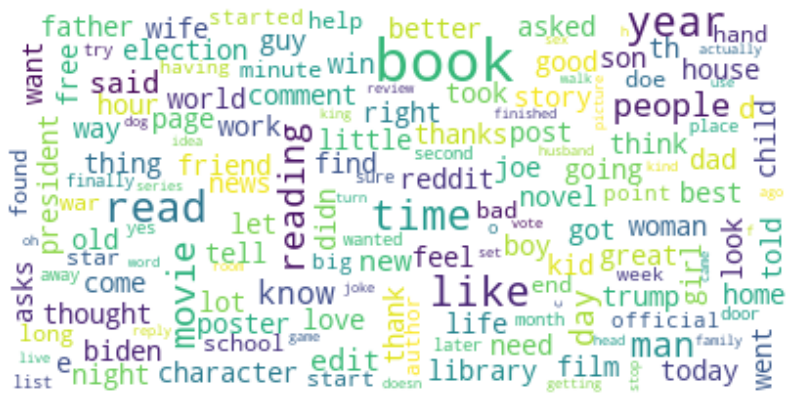

In [33]:
wordcloud = WordCloud(background_color="white",max_font_size=30).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()